In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c share2022mlcomp02
! unzip share2022mlcomp02

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 67% 13.0M/19.4M [00:00<00:00, 134MB/s]
100% 19.4M/19.4M [00:00<00:00, 108MB/s]
Archive:  share2022mlcomp02.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Обработка данных

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [49]:
pd.set_option('max_columns', None)
train_df.head(20)

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291
0,1,2014-01-29,69,38.0,7.0,10.0,1.0,2001.0,2.0,11.0,2.0,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,NaN,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,no,102618,47681,54937,30808,16251,14557,121369,59138,62231,26087,7410,18677,14080,7457,6623,14892,7839,7053,34341,18094,16247,19906,9676,10230,27123,14340,12783,1681.0,173.0,607.0,19.0,245.0,116.0,431.0,1.0,84.0,5.0,1680.0,34.0,299.0,439.0,109.0,799.0,201,2.111149,0.859306,10.311668,0.859306,0.246885,0.340666,3.002409,0.031107,0.246499,2.421729,0.972263,8.936392,3.547837,42.574042,47.0,3.547837,5.660993,47,0.084706,1.016468,0.635933,no,4.591746,17.879840,21.027551,22.324920,23.020791,3.702522,2,no,4.591746,1,0.664562,no,25.905493,32,6.776967,9,21.115333,14.512527,4.876302,2.687778,7.510686,7.252477,13.835920,5.942193,0.412012,2.025949,10.162847,18.744434,7.348942,2.288932,23.814748,2.114343,15.566878,6.223946,1.091195,5.473565,1.472656,0.340666,1.310276,1.089479,0.360212,18.305420,12.444672,10.857512,0.416099,good,12.83,10.47,0,0,0,0,1,1000.00,1500.00,1250.00,0,0,0,1,0,0,0,0,0,1,0,1,0,23.22,8.86,0,0,0,0,1,1000.00,1500.00,1250.00,0,0,0,1,0,0,0,0,0,1,0,2,0,31.54,3.94,0,0,3,73000,7,916.67,1416.67,1166.67,1,0,1,5,0,0,0,1,1,1,0,6,0,35.72,2.21,0,0,4,87000,14,776.92,1230.77,1003.85,1,2,3,8,0,0,0,1,1,1,0,9,0,34.32,2.85,0,0,5,118000,15,776.92,1230.77,1003.85,2,2,3,8,0,0,0,1,3,1,0,12,0,28.67,4.94,0,0,14,345704,22,725.00,1175.00,950.00,2,5,5,9,1,0,0,2,8,1,0,19,2,9500000
1,2,2014-04-07,55,NaN,2.0,1.0,4.0,NaN,2.0,10.0,NaN,OwnerOccupier,Poselenie Filimonkovskoe,3.574795e+07,2546,0.548992,0.034656,175,NaN,0,168,NaN,0,0,NaN,0,0,0,0,no,0,0,0,no,no,no,no,no,no,no,no,2942,1381,1562,365,189,177,1633,863,771,548,156,393,175,91,85,168,87,82,411,214,198,628,337,292,322,166,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206,34.853238,11.428722,151.852635,12.654386,2.313382,5.222637,10.402779,0.000000,1.253943,13.533730,1.950373,19.857550,14.667819,176.013824,24.0,13.646886,38.691921,19,2.734467,32.813601,1.520565,no,11.431536,22.361881,25.036407,26.197779,27.000816,3.088887,13,no,5.815682,38,4.517969,no,35.624048,50,19.965957,8,31.862034,21.741826,12.610964,9.003401,16.008048,9.892700,18.145323,14.321325,3.897271,11.530953,11.725112,16.497903,14.424028,2.013976,35.009400,11.062170,15.492980,12.650180,3.242714,3.242714,3.118928,5.222637,8.053664,2.141268,13.447826,16.058889,15.077451,10.175551,1.421180,no data,100.00,0.00,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,93.45,0.00,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,73.13,1.69,0,0,0,0,1,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,60.03,2.24,0,0,0,0,1,NaN,N

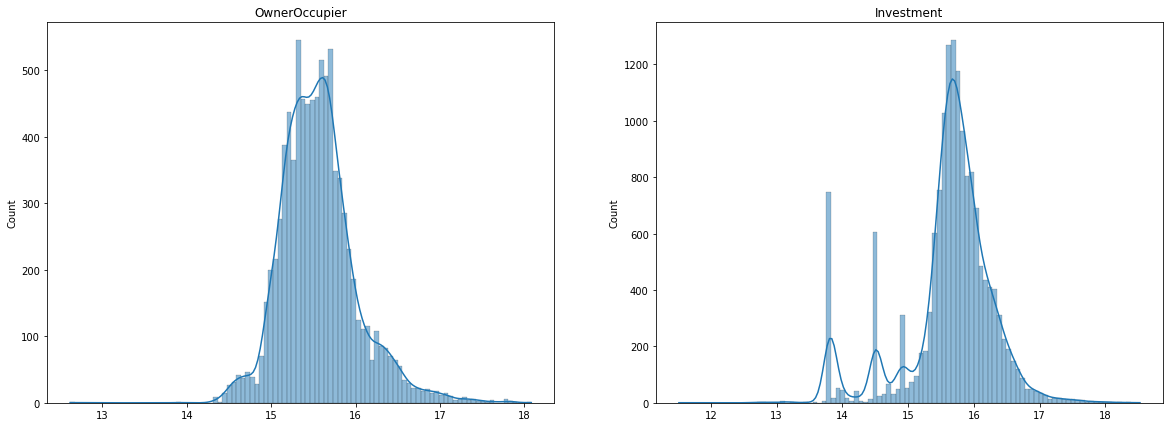

In [47]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)


sns.histplot(np.log(train_df[train_df.f11 == 'OwnerOccupier'].f291.values), ax = ax1, bins=100, kde=True)


ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(np.log(train_df[train_df.f11 == 'Investment'].f291.values), ax = ax2, bins=100, kde=True)


ax1.set_title('OwnerOccupier')
ax2.set_title('Investment')

fig.set_figwidth(20)
fig.set_figheight(7)

plt.show()

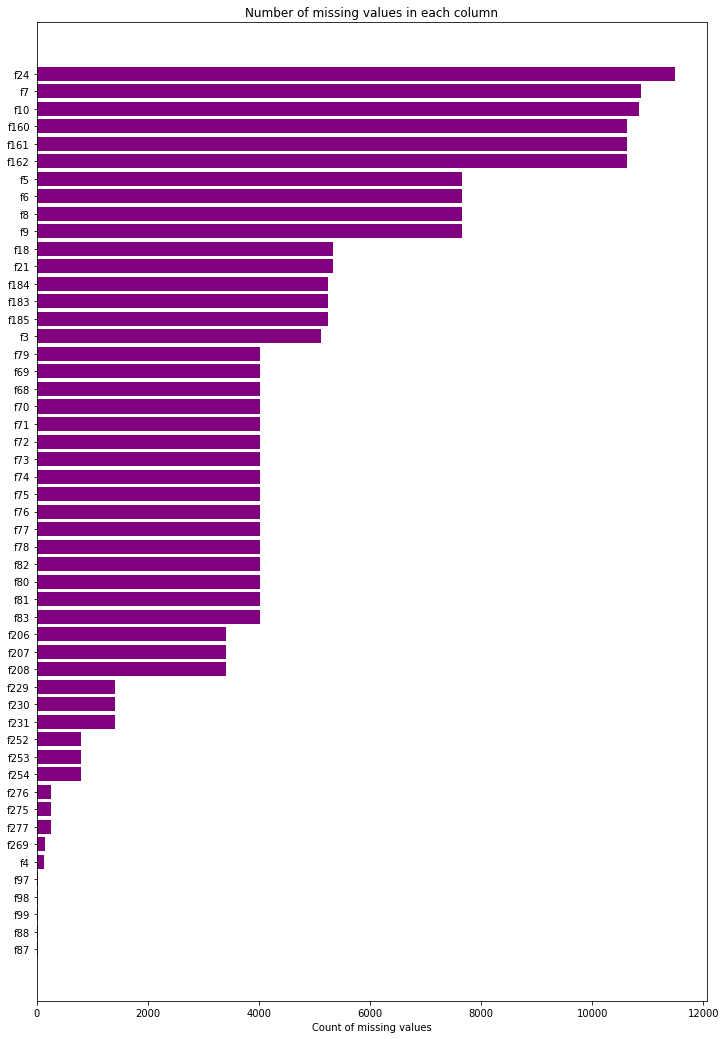

In [ ]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[(missing_df['missing_count'] > 0), :]
missing_df = missing_df.sort_values(by='missing_count')
ind = range(missing_df.shape[0])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df['missing_count'], color="purple")
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [ ]:
ylog_train_all = np.log1p(train_df['f291'].values)
id_test = test_df['id']

train_df.drop(['id', 'f291'], axis=1, inplace=True)
test_df.drop(['id'], axis=1, inplace=True)

df_all = pd.concat([train_df, test_df])

print(df_all.shape)

(30471, 290)


In [ ]:
for col in df_all.columns:
  if df_all[col].dtypes != 'object':
    upper_limit = np.percentile(df_all[col].dropna(), 99)
    lower_limit = np.percentile(df_all[col].dropna(), 1)

    df_all.loc[(df_all[col] > upper_limit), col] = np.NaN
    df_all.loc[(df_all[col] < lower_limit), col] = np.NaN
    if col == 'f7':
      print(upper_limit, lower_limit)



2016.0 0.0


In [ ]:


df_all.f1 = pd.to_datetime(df_all.f1)

# Add month-year-count
month_year = (df_all.f1.dt.month + df_all.f1.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (df_all.f1.dt.weekofyear + df_all.f1.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add year, month and day-of-week
df_all['year'] = df_all.f1.dt.year
df_all['month'] = df_all.f1.dt.month
df_all['dow'] = df_all.f1.dt.dayofweek

df_all.drop(['f1'], axis=1, inplace=True)

<ipython-input-13-a9d57ba71a0d>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)
<ipython-input-13-a9d57ba71a0d>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week_year = (df_all.f1.dt.weekofyear + df_all.f1.dt.year * 100)
<ipython-input-13-a9d57ba71a0d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)
<ipython-input-13-a9

In [ ]:
num_train = len(train_df)

In [ ]:
df_all.f7[df_all.f7 < 1900] = np.NaN

<ipython-input-16-2095a591fcf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.f7[df_all.f7 < 1900] = np.NaN


# Категориальные фичи

In [ ]:
obj = df_all.select_dtypes(include=['object']).columns

In [ ]:
obj = obj.drop('f11')

In [ ]:
for c in obj:
    df_all[c] = pd.factorize(df_all[c])[0]


In [ ]:
df_all[obj]

,f12,f29,f33,f34,f35,f36,f37,f38,f39,f40,f106,f114,f118,f152
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3,0,0,0,0,0,0,0,0,0,0,0,0,3
4,4,0,1,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,59,0,0,0,0,0,0,0,0,0,0,0,0,1
6091,124,0,0,0,0,0,1,0,0,0,0,0,0,3
6092,38,0,0,0,0,1,0,0,0,0,1,0,0,3
6093,0,0,0,0,0,0,0,0,0,0,0,0,0,2


# Train-Test split

In [ ]:
X_train_all = df_all[:num_train]
X_test = df_all[num_train:]

X_train_all['prediction'] = ylog_train_all

data_inv = X_train_all[X_train_all.f11 == 'Investment'].drop('f11', axis = 1)
data_own = X_train_all[X_train_all.f11 == 'OwnerOccupier'].drop('f11', axis = 1)
test_inv = X_test[X_test.f11 == 'Investment'].drop('f11', axis = 1)
test_own = X_test[X_test.f11 == 'OwnerOccupier'].drop('f11', axis = 1)

<ipython-input-323-9cf02dffff1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_all['prediction'] = ylog_train_all


In [ ]:
train_inv, val_inv = data_inv[int(len(data_inv)*0.2):], data_inv[:int(len(data_inv)*0.2)]
train_own, val_own = data_own[int(len(data_own)*0.2):], data_own[:int(len(data_own)*0.2)]

In [ ]:
train_inv.shape, val_inv.shape, train_own.shape, val_own.shape

((12440, 294), (3110, 294), (7061, 294), (1765, 294))

# Обучение

# INV

In [ ]:
df_columns = data_inv.columns[:-1]

dtrain_all_inv = xgb.DMatrix(data_inv.drop('prediction', axis = 1), data_inv.prediction, feature_names=df_columns)
dtrain_inv = xgb.DMatrix(train_inv.drop('prediction', axis = 1), train_inv.prediction, feature_names=df_columns)
dval_inv = xgb.DMatrix(val_inv.drop('prediction', axis = 1), val_inv.prediction, feature_names=df_columns)
dtest_inv = xgb.DMatrix(test_inv, feature_names=df_columns)


In [ ]:

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model_inv = xgb.train(xgb_params, dtrain_inv, num_boost_round=1000, evals=[(dval_inv, 'val')],
                      early_stopping_rounds=20, verbose_eval=20)



[0]	val-rmse:14.4061
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:5.20731
[40]	val-rmse:1.95056
[60]	val-rmse:0.878459
[80]	val-rmse:0.605621
[100]	val-rmse:0.556626
[120]	val-rmse:0.548698
[140]	val-rmse:0.546443
[160]	val-rmse:0.545243
[180]	val-rmse:0.544642
Stopping. Best iteration:
[179]	val-rmse:0.544492



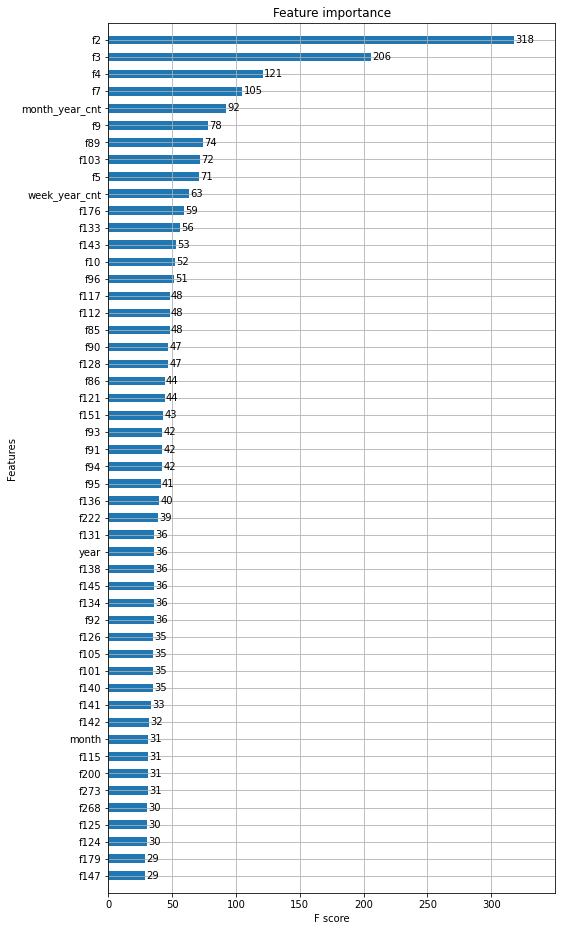

In [ ]:


fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model_inv, max_num_features=50, height=0.5, ax=ax)



[21:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


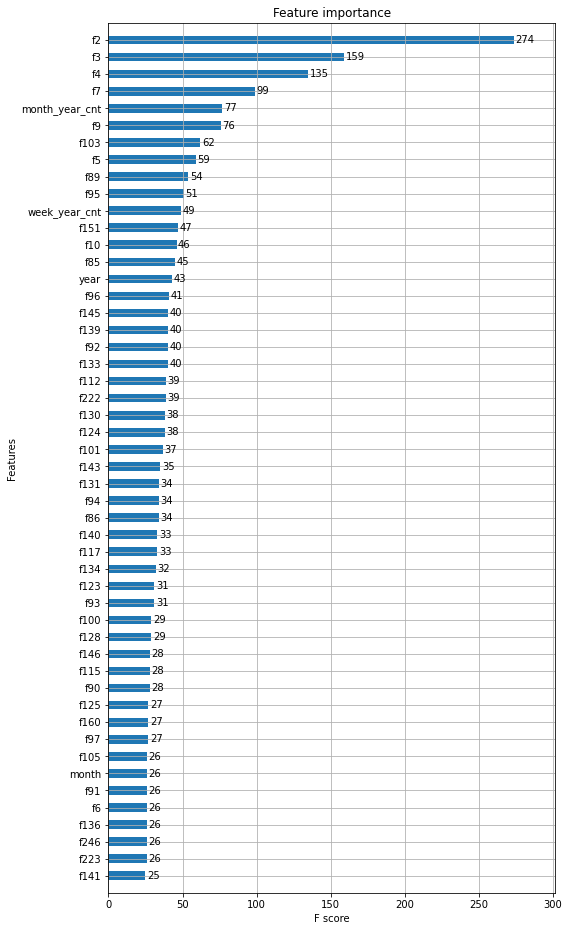

In [ ]:
num_boost_round_inv = partial_model_inv.best_iteration

model_inv = xgb.train(dict(xgb_params, silent=0), dtrain_all_inv, num_boost_round=num_boost_round_inv)

fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model_inv, max_num_features=50, height=0.5, ax=ax)



#OWN

In [ ]:
dtrain_all_own = xgb.DMatrix(data_own.drop('prediction', axis = 1), data_own.prediction, feature_names=df_columns)
dtrain_own = xgb.DMatrix(train_own.drop('prediction', axis = 1), train_own.prediction, feature_names=df_columns)
dval_own = xgb.DMatrix(val_own.drop('prediction', axis = 1), val_own.prediction, feature_names=df_columns)
dtest_own = xgb.DMatrix(test_own, feature_names=df_columns)

In [ ]:

xgb_params = {
    'eta': 0.05,
    'max_depth':5,
    'subsample': 0.6,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model_own = xgb.train(xgb_params, dtrain_own, num_boost_round=1000, evals=[(dval_own, 'val')],
                      early_stopping_rounds=20, verbose_eval=20)

[0]	val-rmse:14.325
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:5.14752
[40]	val-rmse:1.86049
[60]	val-rmse:0.690055
[80]	val-rmse:0.295352
[100]	val-rmse:0.187718
[120]	val-rmse:0.165554
[140]	val-rmse:0.16075
[160]	val-rmse:0.159344
[180]	val-rmse:0.158126
[200]	val-rmse:0.157517
[220]	val-rmse:0.156693
[240]	val-rmse:0.15604
[260]	val-rmse:0.15584
[280]	val-rmse:0.155574
[300]	val-rmse:0.155295
[320]	val-rmse:0.155184
Stopping. Best iteration:
[317]	val-rmse:0.155056



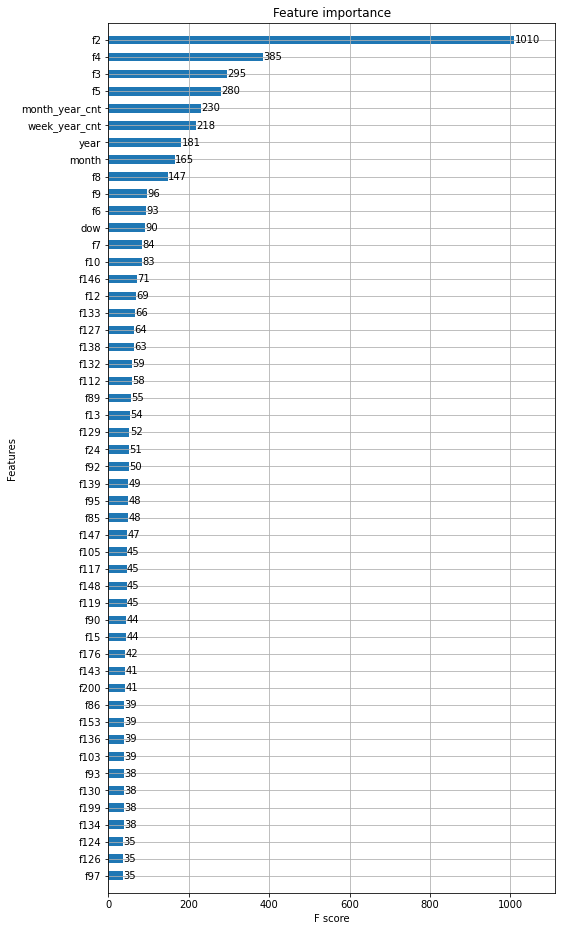

In [ ]:


fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model_own, max_num_features=50, height=0.5, ax=ax)

[21:01:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


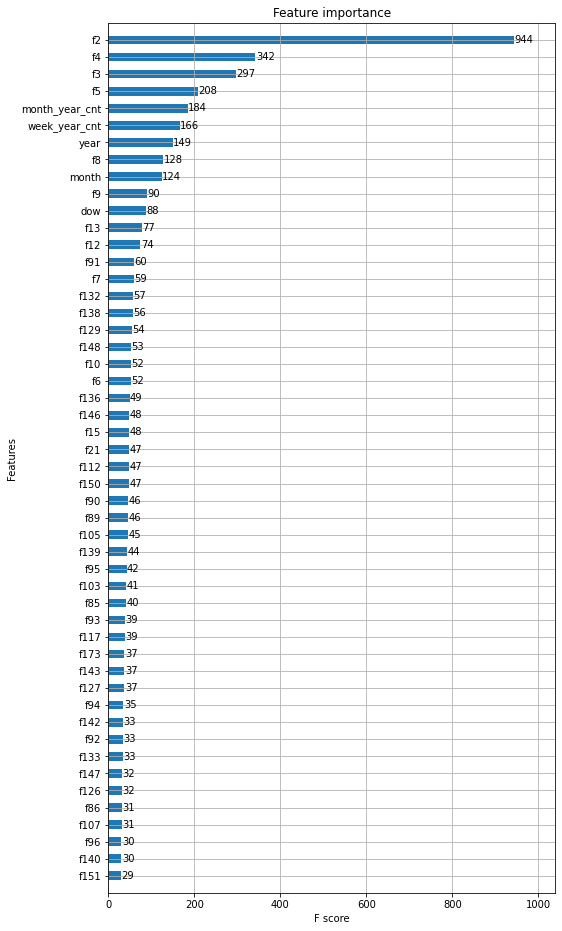

In [ ]:
num_boost_round_own = partial_model_own.best_iteration

model_own = xgb.train(dict(xgb_params, silent=0), dtrain_all_own, num_boost_round=num_boost_round_own)

fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model_own, max_num_features=50, height=0.5, ax=ax)


# предикты

In [ ]:


ylog_pred_inv = model_inv.predict(dtest_inv)
y_pred_inv = np.exp(ylog_pred_inv) - 1
ylog_pred_own = model_own.predict(dtest_own)
y_pred_own = np.exp(ylog_pred_own) - 1

df_sub_inv = pd.DataFrame({'id': test_inv.index, 'prediction': y_pred_inv})
df_sub_own = pd.DataFrame({'id': test_own.index, 'prediction': y_pred_own})

In [ ]:
df_sub_own

,id,prediction
0,0,6825475.50
1,1,5096725.50
2,2,3905290.75
3,3,7612472.50
4,7,3201874.00
...,...,...
2192,6075,7726462.50
2193,6078,3746659.25
2194,6085,12104313.00
2195,6089,7293964.00


In [ ]:
df_sub = pd.concat([df_sub_inv, df_sub_own]).sort_values(by = 'id')

In [ ]:
df_sub['id'] += 1

In [ ]:
df_sub

,id,prediction
0,1,6825475.50
1,2,5096725.50
2,3,3905290.75
3,4,7612472.50
0,5,30659844.00
...,...,...
2196,6091,5064195.00
3894,6092,10691946.00
3895,6093,7699988.00
3896,6094,3825441.00


In [ ]:
df_sub.to_csv('Кучеренко_Александр.csv', index = False)

In [ ]:
sample = pd.read_csv('sample_submission.csv')

In [ ]:
sample

,id,prediction
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
6090,6091,0.0
6091,6092,0.0
6092,6093,0.0
6093,6094,0.0
